In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import geopandas as gpd
import pandas as pd
import urllib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.colors as colors
!pip install contextily
import contextily as cx

In [3]:
# loading in the lion base map data
lion = gpd.read_file('/content/drive/MyDrive/IADS Group Project/lion.gdb', driver='fileGDB', layer='lion')
lion = lion.to_crs({"init": "epsg:2263"})

# since the data has 130+ columns, lets choose ones we think are useful
# metadata can be found at: https://s-media.nyc.gov/agencies/dcp/assets/files/pdf/data-tools/bytes/lion_metadata.pdf
lion = lion[['SegmentID', 'Street', 'CurveFlag', 'RW_TYPE', 'StreetWidth_Min', 'StreetWidth_Max', 'BikeLane', 'Snow_Priority', 'Number_Travel_Lanes', 'Number_Park_Lanes', 'BIKE_TRAFDIR', 'POSTED_SPEED', 'TRUCK_ROUTE_TYPE']]
lion = lion.drop_duplicates(subset='SegmentID', keep="first")

/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:198: RuntimeWarning: driver OpenFileGDB does not support open option DRIVER
  return ogr_read(
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [4]:
print(lion.shape)
lion.head()

(217902, 13)


,SegmentID,Street,CurveFlag,RW_TYPE,StreetWidth_Min,StreetWidth_Max,BikeLane,Snow_Priority,Number_Travel_Lanes,Number_Park_Lanes,BIKE_TRAFDIR,POSTED_SPEED,TRUCK_ROUTE_TYPE
0,0078126,EAST 168 STREET,,1,34.0,34.0,,S,2,2,,25,
1,0079796,WEST 192 STREET,,1,30.0,30.0,,S,1,2,,25,
2,0077356,UNION AVENUE,,1,34.0,34.0,,S,1,2,,25,
6,0073490,DELAFIELD AVENUE,,1,30.0,30.0,,V,2,2,,,
7,0174633,WEST 252 STREET,,3,30.0,30.0,,H,2,,,25,


In [5]:
pip install missingno

In [6]:
import missingno as msno
# replacing empty strings or invalid entries with NaN
lion.replace(["", " ", '', ' '], pd.NA, inplace=True)

<Figure size 1000x600 with 0 Axes>

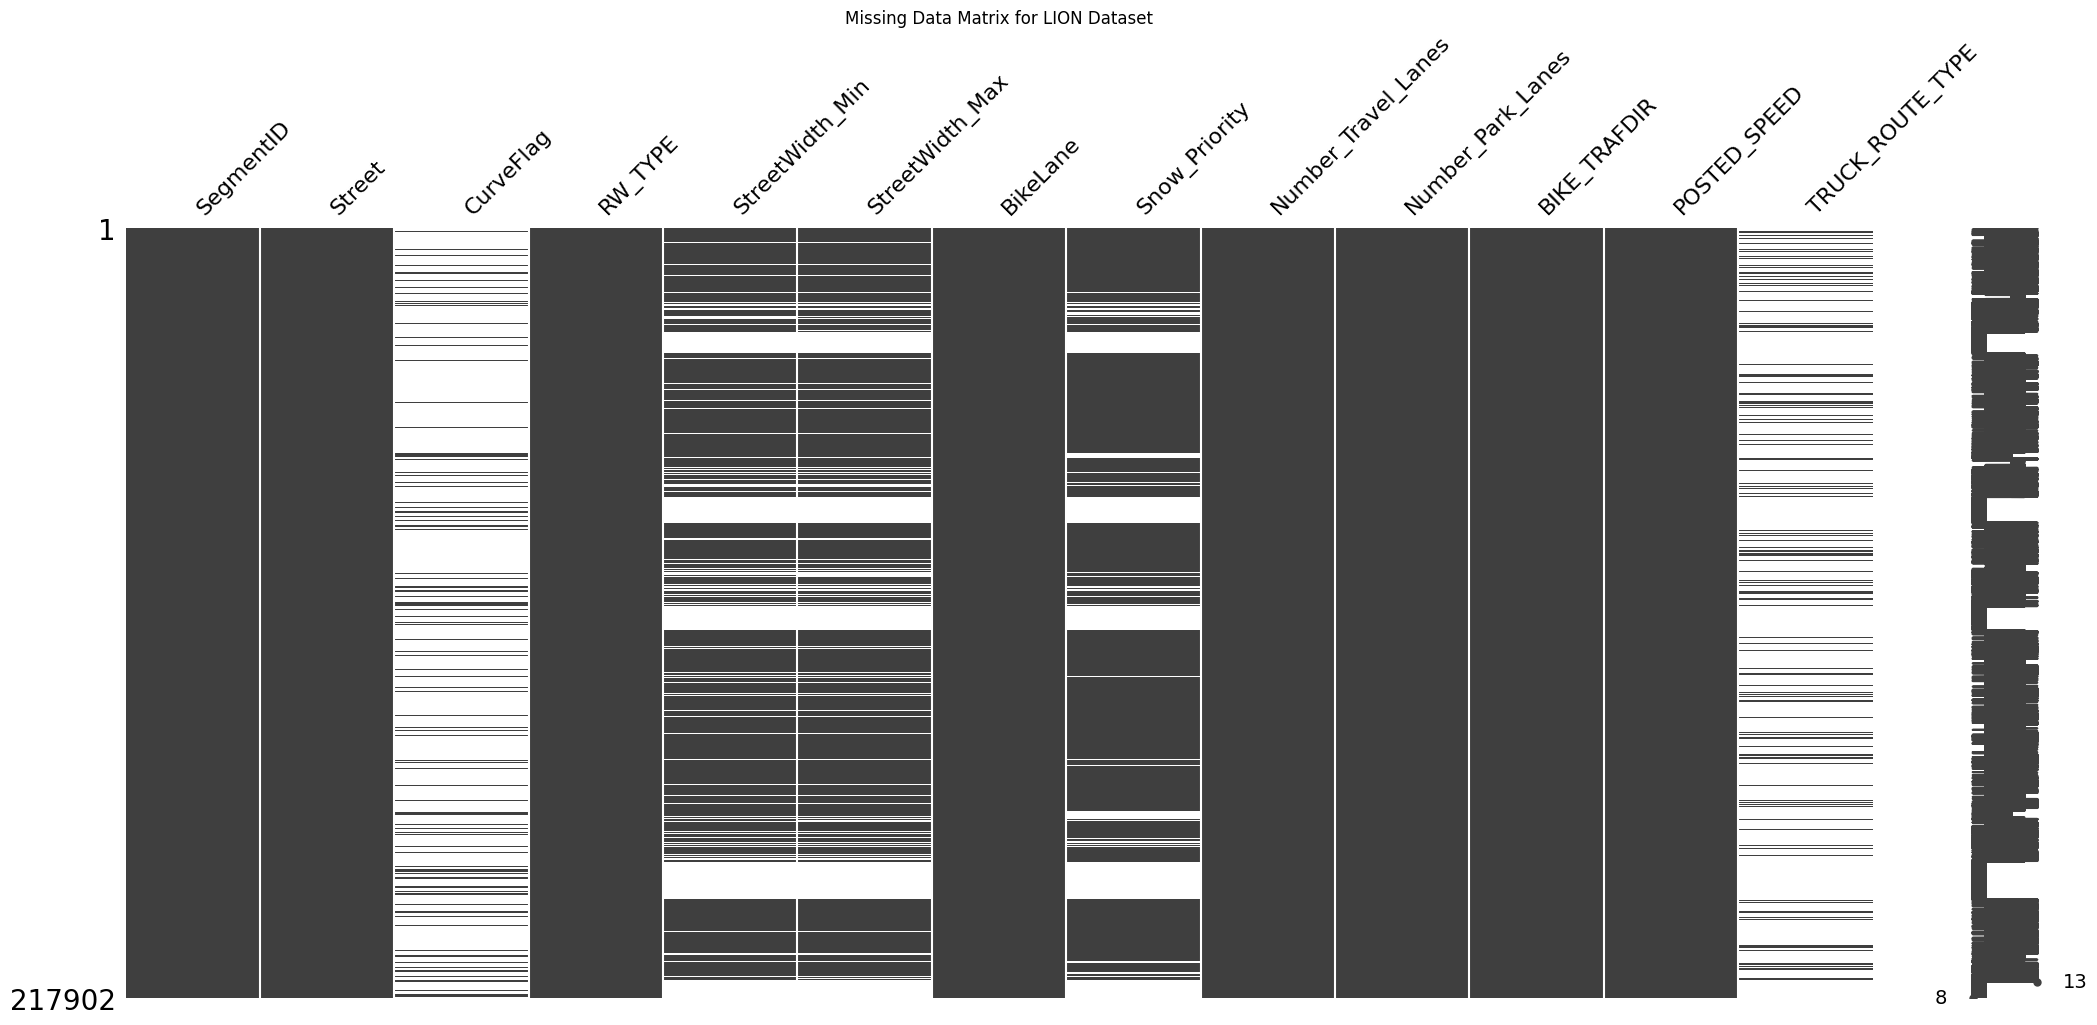

In [7]:
# step 1: visualizing the missing data matrix
plt.figure(figsize=(10, 6))
msno.matrix(lion)
plt.title("Missing Data Matrix for LION Dataset")
plt.show()

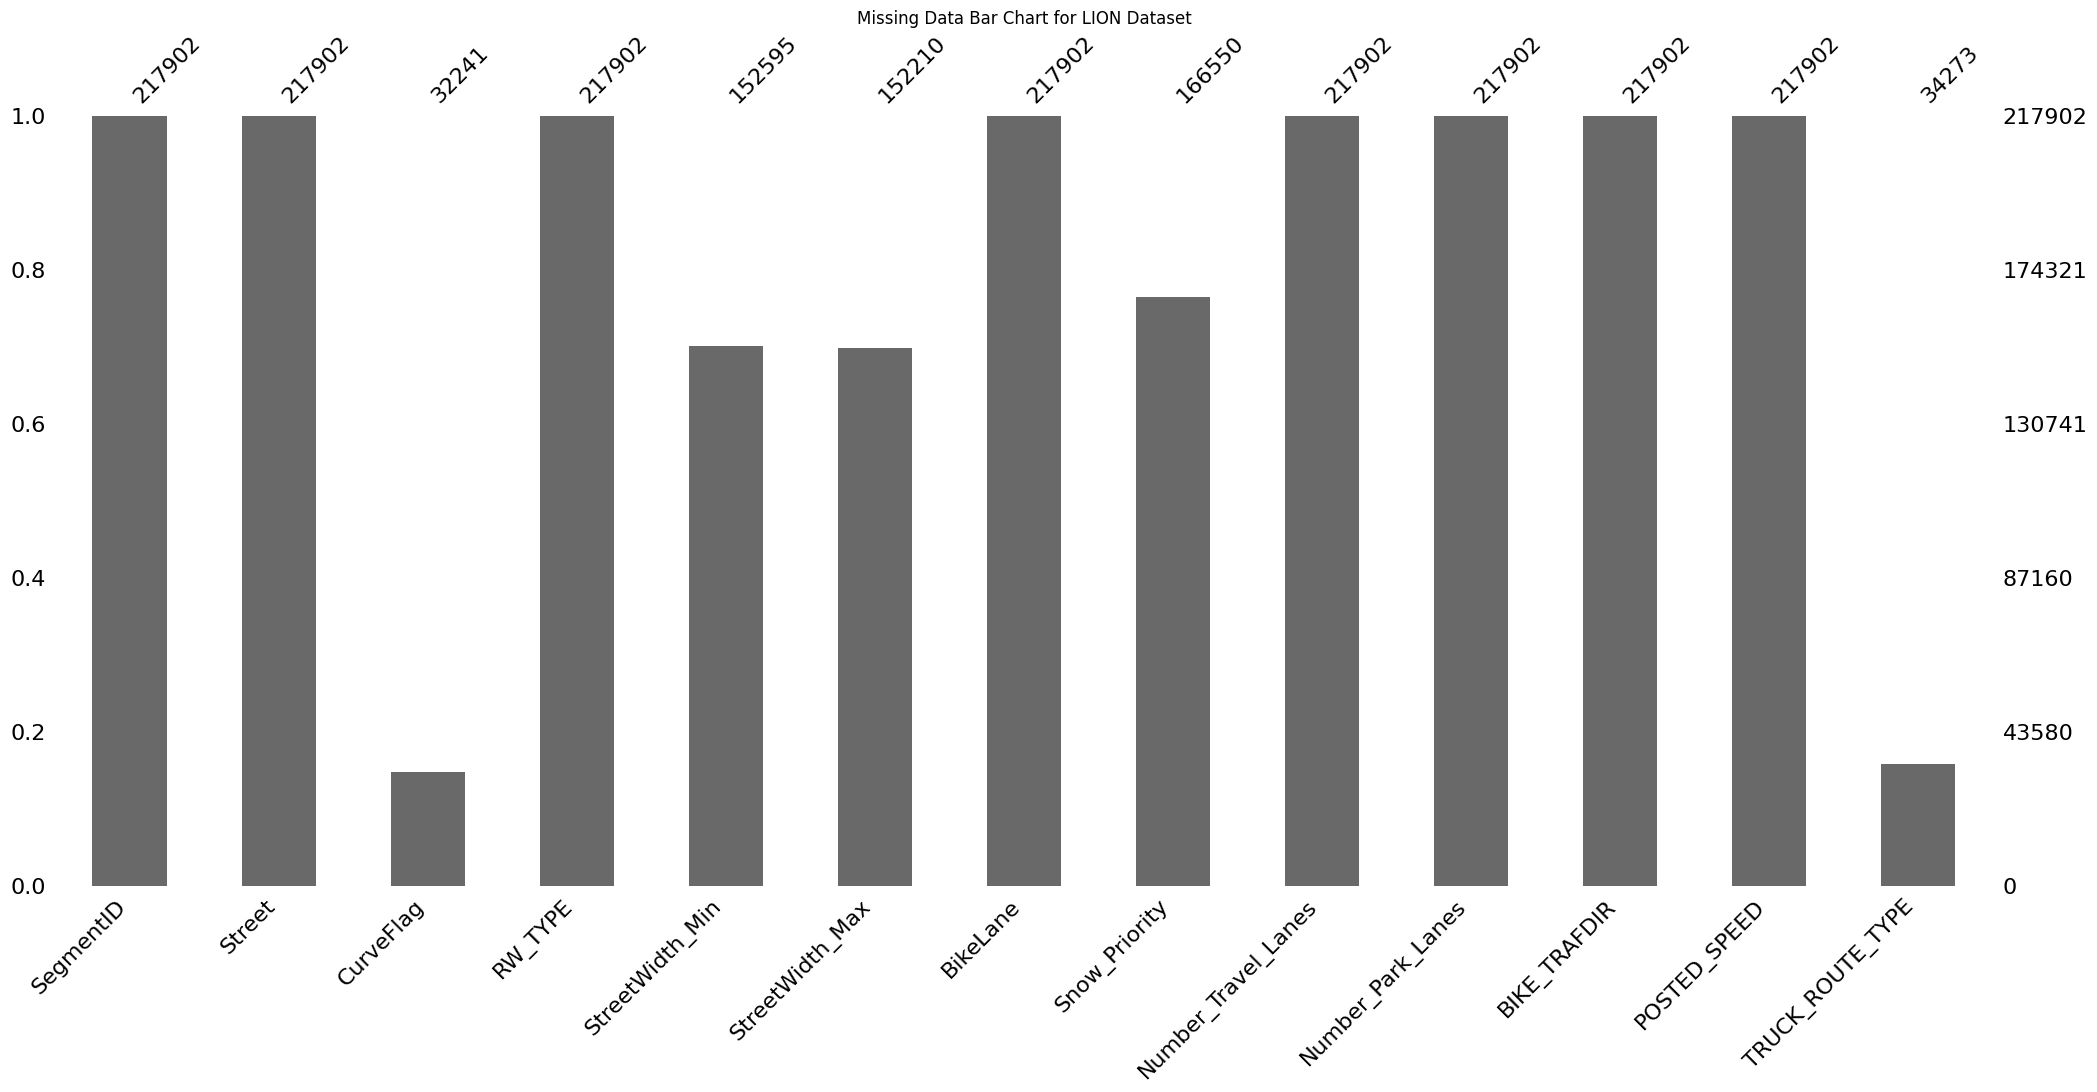

In [8]:
# step 2: bar chart of missing data
plt.figure(figsize=(10, 6))
msno.bar(lion)
plt.title("Missing Data Bar Chart for LION Dataset")
plt.show()

<Figure size 1000x600 with 0 Axes>

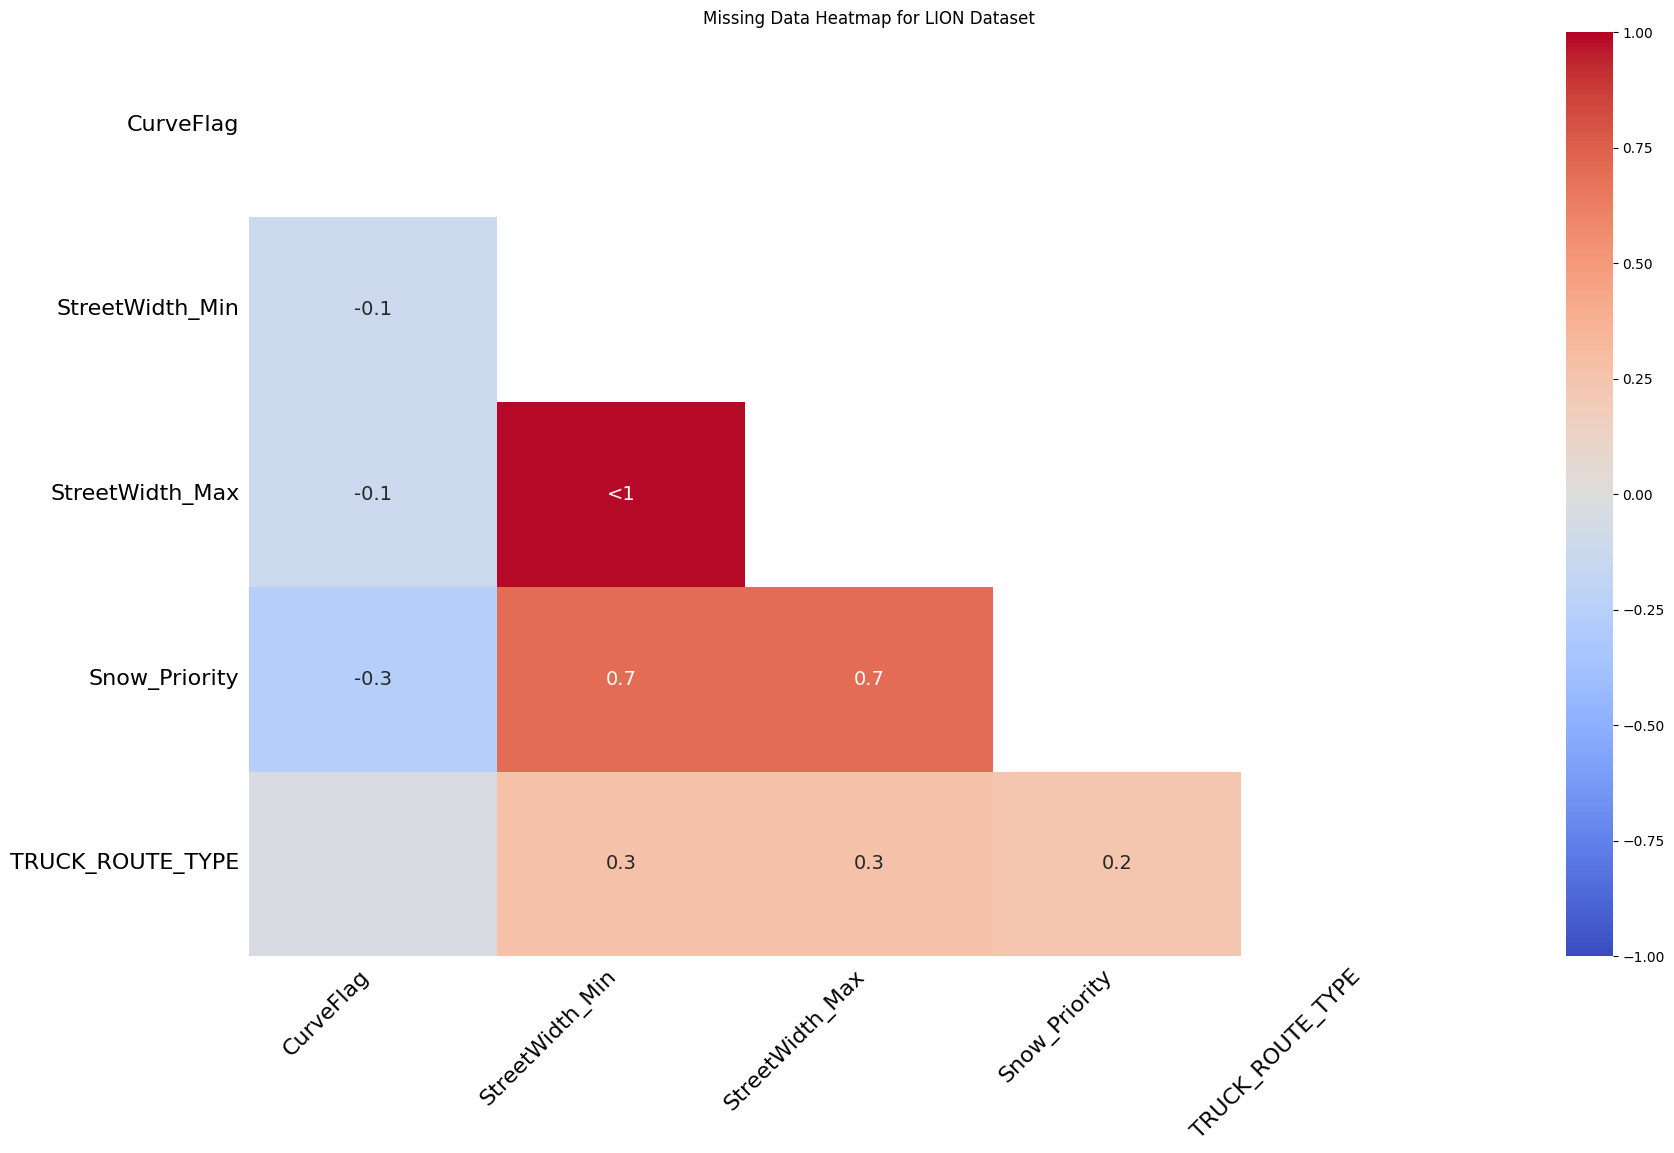

In [9]:
# step 3: heatmap of missing data correlations
plt.figure(figsize=(10, 6))
msno.heatmap(lion, cmap="coolwarm")
plt.title("Missing Data Heatmap for LION Dataset")
plt.show()

<Figure size 1000x600 with 0 Axes>

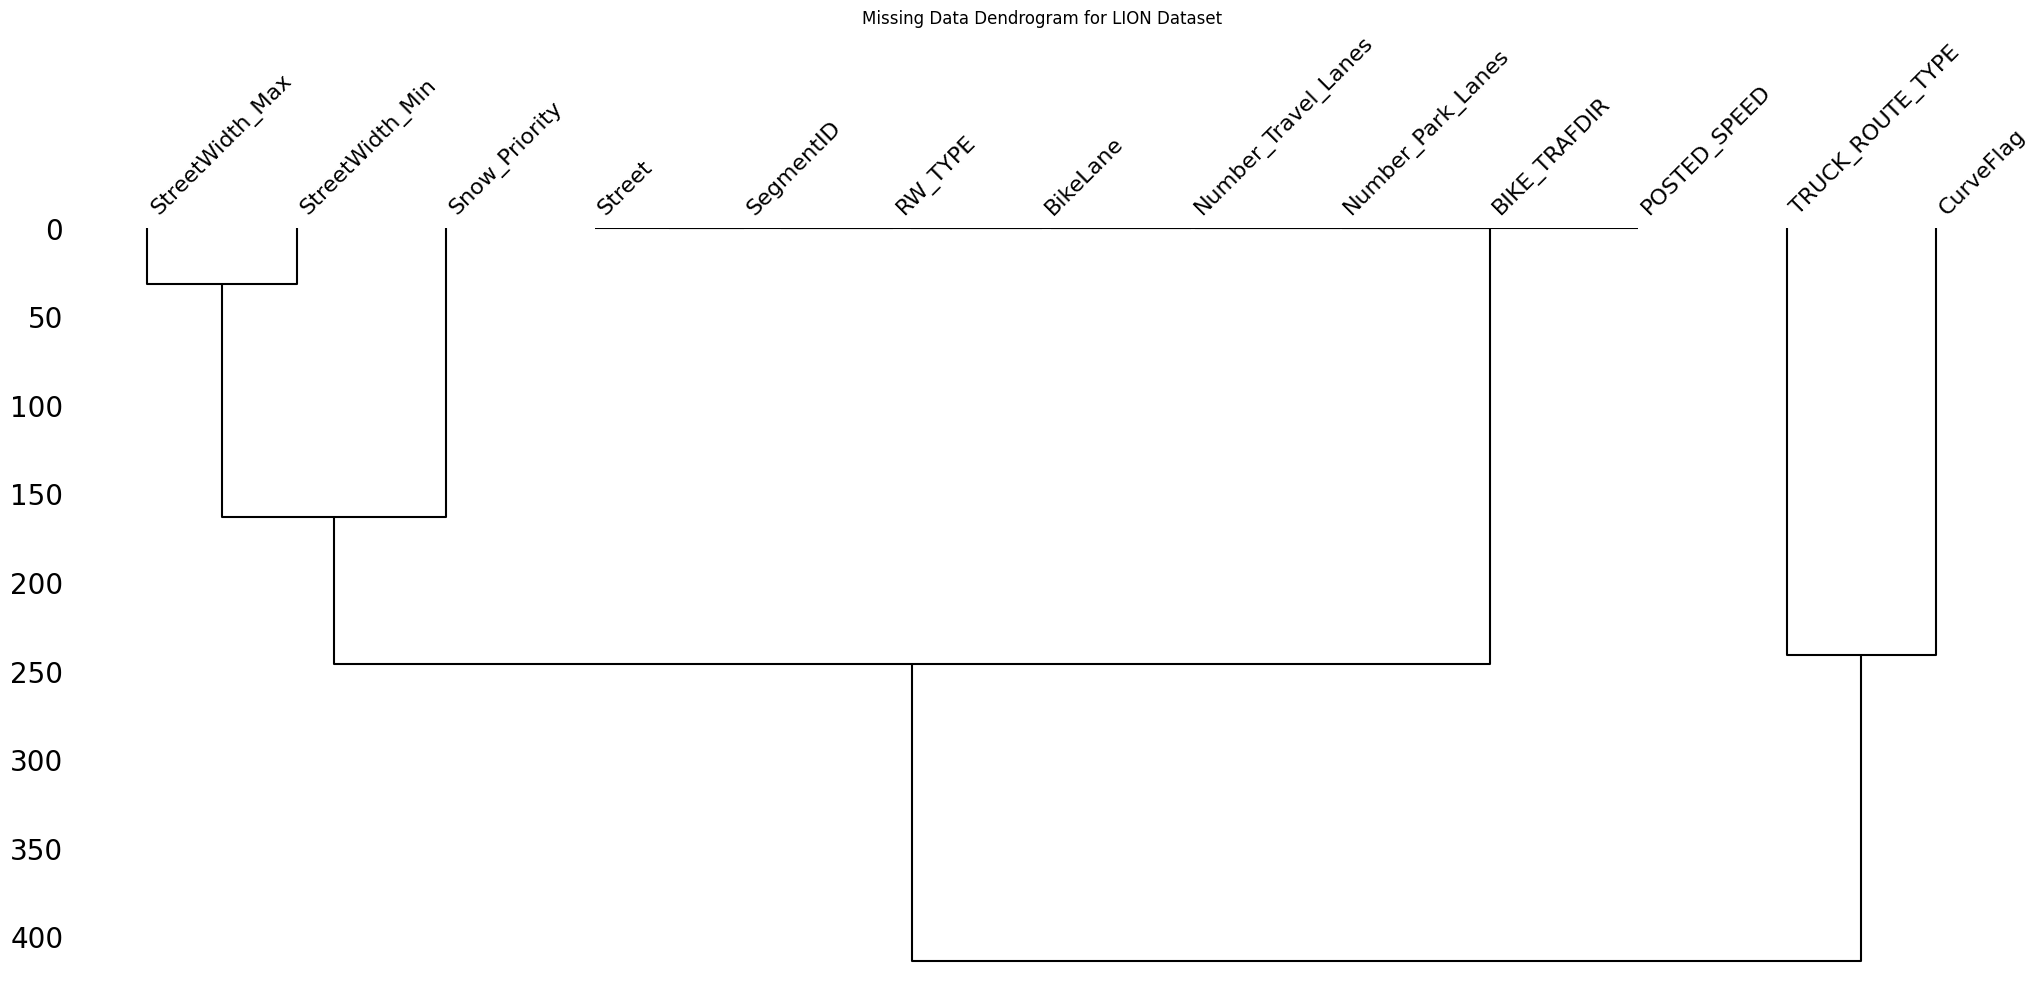

In [10]:
# step 4: dendrogram of missing data clustering
plt.figure(figsize=(10, 6))
msno.dendrogram(lion)
plt.title("Missing Data Dendrogram for LION Dataset")
plt.show()